# Regression Modeling on Telco Churn Data

In [1]:
# Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data Split and Metric Evaluation Imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error, explained_variance_score

# Modeling Imports
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Personal Module Import
import wrangle

In [2]:
# Going through process with Telco Churn data
df = wrangle.prep_telco_df()

No duplicates found.
Dummy variables for gender created as "male".
Yes/No column values changed to boolean, 0 as no and 1 as yes
Combined variable for phone_service + multiple lines created.
Combined variable for partner + dependents created.
Simplified features: security, backup, protection, support, and payment type.
Column for service type added.
Added feature for tenure in years.
Converted total_charges to float for easier manipulation.
Data prep complete.




In [3]:
df.head().T

,0,1,2,3,4
senior_citizen,0.00,0.00,1.00,1.00,0.00
tenure_months,9.00,9.00,7.00,1.00,1.00
phone_service,2.00,1.00,1.00,0.00,0.00
internet_service_type_id,1.00,1.00,1.00,1.00,1.00
online_security,0.00,0.00,1.00,0.00,1.00
online_backup,0.00,0.00,0.00,0.00,0.00
device_protection,0.00,0.00,0.00,0.00,0.00
tech_support,0.00,1.00,0.00,0.00,0.00
streaming_tv,0.00,1.00,0.00,0.00,0.00
streaming_movies,1.00,1.00,0.00,0.00,0.00


# Splitting the Data

In [4]:
train, validate, test = wrangle.train_validate_test(df)

train shape:  (5070, 21) , validate shape:  (1268, 21) , test shape:  (705, 21)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


# Making the Prediction Tenure Months

In [5]:
X_train = train.drop('tenure_months', axis=1)
X_validate = validate.drop('tenure_months', axis=1)
X_test = test.drop('tenure_months', axis=1)

y_train = train.tenure_months
y_validate = validate.tenure_months
y_test = test.tenure_months

X_train.head().T

,855,2823,5656,1016,1175
senior_citizen,0.00,0.00,0.00,0.00,0.00
phone_service,2.00,1.00,1.00,1.00,1.00
internet_service_type_id,1.00,2.00,0.00,1.00,1.00
online_security,0.00,0.00,0.00,1.00,1.00
online_backup,0.00,0.00,0.00,0.00,1.00
device_protection,0.00,0.00,0.00,0.00,0.00
tech_support,0.00,0.00,0.00,0.00,0.00
streaming_tv,0.00,0.00,0.00,0.00,0.00
streaming_movies,0.00,1.00,0.00,0.00,0.00
contract_type_id,1.00,1.00,1.00,1.00,1.00


# Selecting Less Features to Model with

In [6]:
X_train = train[['auto_payment','churn','part_depd','service_type','contract_type']]
X_validate = validate[['auto_payment','churn','part_depd','service_type','contract_type']]
X_test = test[['auto_payment','churn','part_depd','service_type','contract_type']]

# Scaling the Data

In [7]:
# create object
scaler = sklearn.preprocessing.MinMaxScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.index = X_train.index
X_train_scaled.columns = X_train.columns

X_validate_scaled = pd.DataFrame(X_validate_scaled)
X_validate_scaled.index = X_validate.index
X_validate_scaled.columns = X_validate.columns

X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.index = X_test.index
X_test_scaled.columns = X_test.columns

X_train_scaled

,auto_payment,churn,part_depd,service_type,contract_type
855,1.0,1.0,0.0,1.0,0.0
2823,0.0,1.0,0.0,1.0,0.0
5656,1.0,0.0,0.0,0.0,0.0
1016,0.0,0.0,1.0,1.0,0.0
1175,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
4879,0.0,0.0,0.0,1.0,0.5
3320,0.0,1.0,0.0,1.0,0.0
5311,1.0,0.0,1.0,1.0,1.0
3692,0.0,1.0,0.5,1.0,0.0


# Modeling

## 1. set baseline predictions (mean, median)

Average tenure months: 32.12366863905326
Median tenure months: 28.0
Mode tenure months: 0    1
dtype: int64


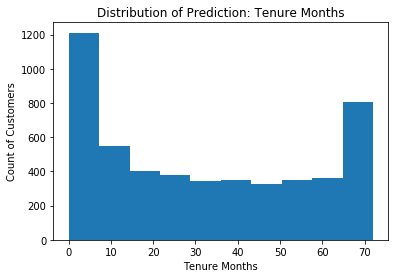

In [9]:
plt.hist(y_train)
plt.title('Distribution of Prediction: Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Count of Customers')

print('Average tenure months:', y_train.mean())
print('Median tenure months:', y_train.median())
print('Mode tenure months:', y_train.mode())

In [10]:
# setting baseline to be the median of tenure months
baseline = np.median(y_train)

## 2. evaluate the baseline (we are comparing y (actual values) to the predicted values, which are all the same value...the mean of y, e.g.)

y: 19, 18, 12, 8, 5

y_pred: 11, 11, 11, 11, 11

In [11]:
baseline_mse = mean_squared_error(y_train, np.full(y_train.shape, np.mean(y_train)))
baseline_rmse = mean_squared_error(y_train, np.full(y_train.shape, np.mean(y_train)))**1/2

print(baseline_rmse)

306.5877179253761


In [12]:
# creating dataframe to hold metrics for each model plus the baseline

metrics = pd.DataFrame()

models = pd.DataFrame(columns=['Baseline_Median','Linear_Regression','LassoLars','Poly_Cubed'], index=['Train_MSE','Train_RMSE','Validate_MSE','Validate_RMSE','Test_MSE','Test_RMSE'])
models['Baseline_Median'] = [round(baseline_mse, 5), round(baseline_rmse, 5), 'NaN', 'NaN','NaN', 'NaN']
models.head(6)

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,NaN,NaN,NaN
Train_RMSE,306.588,NaN,NaN,NaN
Validate_MSE,NaN,NaN,NaN,NaN
Validate_RMSE,NaN,NaN,NaN,NaN
Test_MSE,NaN,NaN,NaN,NaN
Test_RMSE,NaN,NaN,NaN,NaN


## 3. LinearRegression()

In [13]:
# create the object
lm = LinearRegression(normalize=True)

# fit object to the train data only
lm.fit(X_train_scaled, y_train)

# Predict our training observations
lm_pred = lm.predict(X_train_scaled)

# evaluate our training predictions
# compute root mean squared error
lm_mse = mean_squared_error(y_train, lm_pred)
lm_rmse = lm_mse**1/2

In [14]:
models['Linear_Regression'] = [round(lm_mse, 5), round(lm_rmse, 5), 'NaN', 'NaN','NaN', 'NaN']
models.head()

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,276.524,NaN,NaN
Train_RMSE,306.588,138.262,NaN,NaN
Validate_MSE,NaN,NaN,NaN,NaN
Validate_RMSE,NaN,NaN,NaN,NaN
Test_MSE,NaN,NaN,NaN,NaN


## 4. LassoLars()

In [15]:
# create the object
lars = LassoLars(alpha=0.1)

# fit to the train data only
lars.fit(X_train_scaled, y_train)

# predict our training observations
lars_pred = lars.predict(X_train_scaled)

# evaluate our training predictions
lars_mse = mean_squared_error(y_train, lars_pred)
lars_rmse = lars_mse**1/2

In [16]:
models['LassoLars'] = [round(lars_mse, 5), round(lars_rmse, 5),'NaN', 'NaN','NaN', 'NaN']
models.head()

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,276.524,382.656,NaN
Train_RMSE,306.588,138.262,191.328,NaN
Validate_MSE,NaN,NaN,NaN,NaN
Validate_RMSE,NaN,NaN,NaN,NaN
Test_MSE,NaN,NaN,NaN,NaN


## 5. PolynomialFeatures(degree=2) ... then LinearRegression()

In [17]:
# create the object - make the polynomial thing
pf = PolynomialFeatures(degree=3)

# fit and transform the thing
# to get a new set of features..which are the original features sqauared
X_train_cubed = pf.fit_transform(X_train_scaled)

# fit the model using our training observations that have been cubed.
# feed that data into our linear model
# make the thing
lm_cubed = LinearRegression()
lm_cubed.fit(X_train_cubed, y_train)

# predict our training observations (the cubed version)
lm_cubed_pred = lm_cubed.predict(X_train_cubed)

# evaluate our predictions on training observations
lm_cubed_mse = mean_squared_error(y_train, lm_cubed_pred)
lm_cubed_rmse = lm_cubed_mse**1/2

In [18]:
models['Poly_Cubed'] = [round(lm_cubed_mse, 5), round(lm_cubed_rmse, 5),'NaN', 'NaN','NaN', 'NaN']
models.head()

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,276.524,382.656,262.241
Train_RMSE,306.588,138.262,191.328,131.121
Validate_MSE,NaN,NaN,NaN,NaN
Validate_RMSE,NaN,NaN,NaN,NaN
Test_MSE,NaN,NaN,NaN,NaN


### Takeaways
- Baseline is the woooorst
- Will validate on the three models
    - Are any overfitting?

# Validate Models

## Linear Regression

In [19]:
# predict model created with train - testing on validate
lm_pred_v = lm.predict(X_validate_scaled)

# evaluate
lm_v_mse = mean_squared_error(y_validate, lm_pred_v)
lm_v_rmse = lm_v_mse**1/2

# add to df
models['Linear_Regression'] = [round(lm_mse, 5), round(lm_rmse, 5), round(lm_v_mse, 5), round(lm_v_rmse, 5),'NaN', 'NaN']
models.head()

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,276.524,382.656,262.241
Train_RMSE,306.588,138.262,191.328,131.121
Validate_MSE,NaN,266.701,NaN,NaN
Validate_RMSE,NaN,133.35,NaN,NaN
Test_MSE,NaN,NaN,NaN,NaN


- performed the same on validate

## LassoLars

In [20]:
# predict model created with train - testing on validate
lars_pred_v = lars.predict(X_validate_scaled)

# evaluate our validation predictions
lars_v_mse = mean_squared_error(y_validate, lars_pred_v)
lars_v_rmse = lars_v_mse**1/2

In [21]:
models['LassoLars'] = [round(lars_mse, 5), round(lars_rmse, 5),round(lars_v_mse, 5), round(lars_v_rmse, 5),'NaN', 'NaN']
models

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,276.524,382.656,262.241
Train_RMSE,306.588,138.262,191.328,131.121
Validate_MSE,NaN,266.701,364.323,NaN
Validate_RMSE,NaN,133.35,182.162,NaN
Test_MSE,NaN,NaN,NaN,NaN
Test_RMSE,NaN,NaN,NaN,NaN


## Polynomial Features

In [22]:
# cube the validate data
X_validate_cubed = pf.transform(X_validate_scaled)

# predict model created with train - testing on validate
lm_cubed_pred_v = lm_cubed.predict(X_validate_cubed)

# evaluate our predictions on validation observations
lm_cubed_v_mse = mean_squared_error(y_validate, lm_cubed_pred_v)
lm_cubed_v_rmse = lm_cubed_v_mse**1/2

In [23]:
models['Poly_Cubed'] = [round(lm_cubed_mse, 5), round(lm_cubed_rmse, 5),round(lm_cubed_v_mse, 5), round(lm_cubed_v_rmse, 5),'NaN', 'NaN']
models

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,276.524,382.656,262.241
Train_RMSE,306.588,138.262,191.328,131.121
Validate_MSE,NaN,266.701,364.323,257.299
Validate_RMSE,NaN,133.35,182.162,128.65
Test_MSE,NaN,NaN,NaN,NaN
Test_RMSE,NaN,NaN,NaN,NaN


## Takeaways
- LassoLars performs worse than LineaRegression and PolynomialFeatures
- LinearRegression is more consistent from train to validate
- Will use LinearRegression on the Test data

# Test Best Model

In [25]:
# predict model created with train - testing on test
lm_pred_t = lm.predict(X_test_scaled)

# evaluate
lm_t_mse = mean_squared_error(y_test, lm_pred_t)
lm_t_rmse = lm_t_mse**1/2

# add to df
models['Linear_Regression'] = [round(lm_mse, 5), round(lm_rmse, 5), round(lm_v_mse, 5), round(lm_v_rmse, 5),round(lm_t_mse, 5), round(lm_t_rmse, 5)]
models

,Baseline_Median,Linear_Regression,LassoLars,Poly_Cubed
Train_MSE,613.175,276.52380,382.656,262.241
Train_RMSE,306.588,138.26190,191.328,131.121
Validate_MSE,NaN,266.70073,364.323,257.299
Validate_RMSE,NaN,133.35036,182.162,128.65
Test_MSE,NaN,272.98681,NaN,NaN
Test_RMSE,NaN,136.49341,NaN,NaN


# Takeaways
- LinearRegression Model best predicted the tenure of customers, staying consistent through train, validate, test
- All models performed better than the baseline
- Note, can try with different features for X_train